In [ ]:
import torchvision
import torch
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import time
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = torchvision.datasets.FashionMNIST('./data', download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
validationset = torchvision.datasets.FashionMNIST('./data', download=True, train=False, transform=transform)
val_loader = torch.utils.data.DataLoader(validationset, batch_size=64, shuffle=True)

In [ ]:
sample = next(iter(train_loader))
imgs, lbls = sample

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image tensor: torch.Size([64, 1, 28, 28])
class labels: tensor([3, 1, 4, 7, 4, 2, 6, 8, 3, 6, 0, 5, 6, 8, 8, 8, 5, 9, 7, 1, 9, 6, 7, 6,
        4, 1, 8, 9, 2, 0, 9, 6, 7, 4, 5, 7, 8, 6, 8, 7, 7, 0, 0, 4, 3, 0, 8, 4,
        8, 1, 9, 1, 5, 8, 2, 8, 9, 3, 3, 1, 1, 8, 5, 9])


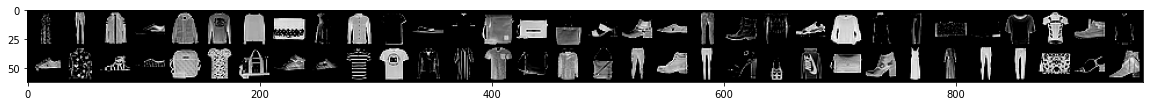

In [ ]:
# create a grid 
plt.figure(figsize=(20,15))
grid = torchvision.utils.make_grid(nrow=32, tensor=imgs)
print(f"image tensor: {imgs.shape}")
print(f"class labels: {lbls}")
plt.imshow(np.transpose(grid, axes=(1,2,0)), cmap='gray')

In [ ]:
class Net(nn.Module): 
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(3,3))
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3,3))
        self.fc1 = nn.Linear(in_features=64*5*5, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=64)
        self.out = nn.Linear(in_features=64, out_features=10)
        
    def forward(self, t): 
        
        # hidden conv layer 
        t = self.conv1(t)
        t = F.relu(t)
        t = self.pool(t)
        
        # hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = self.pool(t)
        
        # flatten
        t = t.view(-1, 64*5*5)

        # fully connection layer
        t = self.fc1(t)
        t = F.relu(t)
        t = self.fc2(t)
        t = F.relu(t)
        
        # output
        t = self.out(t)
        
        return F.log_softmax(t,dim=1)   

In [ ]:
cnn_model = Net() 
print(cnn_model) 

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1600, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
optimizer = optim.Adam(lr=0.01, params=cnn_model.parameters())

# def train loop
for epoch in range(5):
    start_time = time.time()
    total_correct = 0
    total_loss = 0
    for batch in train_loader:
        imgs, lbls = batch
        preds = cnn_model(imgs) # get preds
        loss = F.cross_entropy(preds, lbls) # compute loss
        optimizer.zero_grad() # zero grads
        loss.backward() # calculates gradients 
        optimizer.step() # update the weights
        
        total_loss += loss.item()
        total_correct += preds.argmax(dim=1).eq(lbls).sum().item()
        accuracy = total_correct/len(trainset)
    end_time = time.time() - start_time    
    print("Epoch no.",epoch+1 ,"|accuracy: ", round(accuracy, 3),"%", "|total_loss: ", total_loss, "| epoch_duration: ", round(end_time,2),"sec")

Epoch no. 1 |accuracy:  0.824 % |total_loss:  454.5728760510683 | epoch_duration:  59.42 sec
Epoch no. 2 |accuracy:  0.872 % |total_loss:  333.78614021092653 | epoch_duration:  60.46 sec
Epoch no. 3 |accuracy:  0.878 % |total_loss:  316.07979721575975 | epoch_duration:  60.73 sec
Epoch no. 4 |accuracy:  0.886 % |total_loss:  300.2340823635459 | epoch_duration:  60.8 sec
Epoch no. 5 |accuracy:  0.891 % |total_loss:  282.1572009027004 | epoch_duration:  59.83 sec


In [ ]:
total_correct_val = 0
total_loss_val = 0
for batch in val_loader:
  images, labels = batch
  preds = cnn_model(images) # get preds
  loss = F.cross_entropy(preds, labels) # compute loss
  total_loss_val += loss.item()
  total_correct_val += preds.argmax(dim=1).eq(labels).sum().item()
  accuracy_val = total_correct/len(validationset)
  
print("accuracy_val: ", round(accuracy_val, 3),"%", "|loss_val: ", total_loss_val)
        

accuracy_val:  0.88 % |loss_val:  53.17175029218197
